In [1]:
# instead of looking at each match
# lets look at each hero

In [1]:
import pandas as pd
import json
import glob
import datetime
import numpy as np

In [2]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
matplotlib.rcParams.update({'font.size': 16})

In [3]:
def convert_time(s):
    return datetime.datetime.fromtimestamp(s).strftime('%Y-%m-%d %H:%M:%S.%f')

In [4]:
def read_json_file(filename):
    with open(filename, "r") as f:
        return json.load(f)

In [5]:
hero_map = pd.read_json("hero_map.json")
hero_map.set_index('idx', inplace=True)

In [6]:
hero_map.loc[64].values[0]

'Jakiro'

In [7]:
filenames = glob.glob("stratz_match_data_2021_2022_tour_1/*")

In [8]:
filenames

['stratz_match_data_2021_2022_tour_1/NA.json',
 'stratz_match_data_2021_2022_tour_1/SEA.json',
 'stratz_match_data_2021_2022_tour_1/EEU.json',
 'stratz_match_data_2021_2022_tour_1/SA.json',
 'stratz_match_data_2021_2022_tour_1/WEU.json',
 'stratz_match_data_2021_2022_tour_1/CN.json']

In [9]:
data = {}
for filename in filenames:
    key = filename.split("/")[-1].split(".")[0]
    data[key] = read_json_file(filename)

In [10]:
hero_map.loc[71]

hero    Spirit Breaker
Name: 71, dtype: object

In [11]:
data["NA"]["data"]["league"]['matches'][0]['id']

6388378756

In [12]:
np.sum(data["NA"]["data"]["league"]['matches'][0]['stats']['radiantKills'])

36

In [13]:
np.sum(data["NA"]["data"]["league"]['matches'][0]['stats']['direKills'])

14

In [14]:
len(data["NA"]["data"]["league"]['matches'][0]['stats']['direKills'])

37

In [12]:
data["NA"]["data"]["league"]['matches'][0]['stats']['pickBans'][4]

{'heroId': 71,
 'isPick': True,
 'order': 4,
 'playerIndex': 0,
 'team': None,
 'wasBannedSuccessfully': None}

In [16]:
data["NA"]["data"]["league"]['matches'][0]['players']

[{'matchId': 6388378756,
  'playerSlot': 0,
  'steamAccountId': 84429681,
  'isRadiant': True,
  'isVictory': True,
  'heroId': 71,
  'gameVersionId': 149,
  'kills': 9,
  'deaths': 5,
  'assists': 19,
  'leaverStatus': 0,
  'numLastHits': 138,
  'numDenies': 11,
  'goldPerMinute': 423,
  'networth': 13010,
  'experiencePerMinute': 570,
  'level': 21,
  'gold': 1105,
  'goldSpent': 14530,
  'heroDamage': 15733,
  'towerDamage': 1010,
  'heroHealing': 0,
  'partyId': None,
  'isRandom': False,
  'lane': 3,
  'streakPrediction': None,
  'intentionalFeeding': False,
  'role': 0,
  'roleBasic': 0,
  'imp': 1,
  'award': 2,
  'item0Id': 50,
  'item1Id': 178,
  'item2Id': 36,
  'item3Id': 90,
  'item4Id': 123,
  'item5Id': 21,
  'backpack0Id': None,
  'backpack1Id': None,
  'backpack2Id': None,
  'neutral0Id': 331,
  'behavior': None},
 {'matchId': 6388378756,
  'playerSlot': 1,
  'steamAccountId': 126238768,
  'isRadiant': True,
  'isVictory': True,
  'heroId': 36,
  'gameVersionId': 149,
 

In [13]:
[p['playerIndex'] for p in data["NA"]["data"]["league"]['matches'][0]['stats']['pickBans']]

[0, 0, 0, 0, 0, 5, 7, 2, 0, 0, 0, 0, 0, 0, 9, 3, 4, 6, 0, 0, 0, 0, 1, 8]

In [14]:
[p['playerIndex'] for p in data["NA"]["data"]["league"]['matches'][1]['stats']['pickBans']]

[0, 0, 0, 0, 0, 9, 7, 3, 0, 0, 0, 0, 0, 0, 6, 2, 4, 8, 0, 0, 0, 0, 1, 5]

In [15]:
[p['playerIndex'] for p in data["NA"]["data"]["league"]['matches'][-1]['stats']['pickBans']]

[0, 0, 0, 0, 2, 7, 5, 3, 0, 0, 0, 0, 0, 0, 9, 4, 1, 8, 0, 0, 0, 0, 0, 6]

In [16]:
names = ['ban','ban','ban','ban','pick','pick','pick','pick','ban','ban','ban','ban','ban','ban','pick','pick','pick','pick','ban','ban','ban','ban','pick','pick']
pick_ban_order = pd.DataFrame({
    'index':np.arange(len(names))+1,
    'name':names
}).set_index('index')

In [17]:
pick_ban_order.T

index   1    2    3    4     5     6     7     8    9    10  ...    15    16  \
name   ban  ban  ban  ban  pick  pick  pick  pick  ban  ban  ...  pick  pick   

index    17    18   19   20   21   22    23    24  
name   pick  pick  ban  ban  ban  ban  pick  pick  

[1 rows x 24 columns]

In [18]:
pick_ban_order

name
index      
1       ban
2       ban
3       ban
4       ban
5      pick
6      pick
7      pick
8      pick
9       ban
10      ban
11      ban
12      ban
13      ban
14      ban
15     pick
16     pick
17     pick
18     pick
19      ban
20      ban
21      ban
22      ban
23     pick
24     pick

In [19]:
data["NA"]["data"]["league"]['matches'][0]['players'][0]['heroId']

71

In [20]:
[p['playerSlot'] for p in data["NA"]["data"]["league"]['matches'][0]['players']]

[0, 1, 2, 3, 4, 128, 129, 130, 131, 132]

In [21]:
for p in data["NA"]["data"]["league"]['matches'][0]['players']:
    print(p['playerSlot'], p['steamAccountId'])

0 84429681
1 126238768
2 86822085
3 50828662
4 110448679
128 110583422
129 81475303
130 412758827
131 138880576
132 153125655


In [22]:
def get_rows_df(data_matches, region):
    ks = ['id', 'radiantTeamId', 'direTeamId', 'startDateTime', 'firstBloodTime', 'didRadiantWin']
    rows = []
    for i, m in enumerate(data_matches):
        row = {k:data_matches[i][k] for k in ks}

        row['radiantTeam'] = data_matches[i]['radiantTeam']['name']
        row['direTeam'] = data_matches[i]['direTeam']['name']
        row['startDateTime'] = convert_time(row['startDateTime'])
        
        
        row['series_type'] = data_matches[i]['series']['type']
        
        row['series_match_ids'] = [match_ids['id'] for match_ids in data_matches[i]['series']['matches']]
        
        
        row['region'] = region
        
        stats = data_matches[i]['stats']
        try:
            for j, pb in enumerate(stats['pickBans']):
                row['heroId'] = pb['heroId']
                row['heroName'] = hero_map.loc[pb['heroId']].values[0]
                row['order'] = pb['order']
                row['isPick'] = pb['isPick']
                
                rows.append(list(row.values()))
        except:
            pass
            print(f"case failed: index: {i}, match id: {m['id']}")
        
    cols = list(row.keys())
    # print(cols)
    df = pd.DataFrame(rows, columns=cols)
    return df

In [23]:
dfs = []
for k in data.keys():
    print(f"region: {k}")
    dfs.append(get_rows_df(data[k]["data"]["league"]['matches'], k))
df = pd.concat(dfs)

region: NA
region: SEA
case failed: index: 28, match id: 6366198239
case failed: index: 51, match id: 6315059728
region: EEU
region: SA
region: WEU
case failed: index: 67, match id: 6299515051
region: CN


In [24]:
# 67, match id: 6299515051
# https://stratz.com/matches/6299515051?minute=46
# this reply file was corrupted

In [25]:
# 28, match id: 6366198239
# https://stratz.com/matches/6366198239?minute=42
# corrupted reply
# 51, match id: 6315059728
# https://stratz.com/matches/6315059728?minute=51
# corrupted

In [26]:
df.head(30)

id  radiantTeamId  direTeamId               startDateTime  \
0   6388378756        7819028     8376426  2022-01-21 00:00:01.000000   
1   6388378756        7819028     8376426  2022-01-21 00:00:01.000000   
2   6388378756        7819028     8376426  2022-01-21 00:00:01.000000   
3   6388378756        7819028     8376426  2022-01-21 00:00:01.000000   
4   6388378756        7819028     8376426  2022-01-21 00:00:01.000000   
5   6388378756        7819028     8376426  2022-01-21 00:00:01.000000   
6   6388378756        7819028     8376426  2022-01-21 00:00:01.000000   
7   6388378756        7819028     8376426  2022-01-21 00:00:01.000000   
8   6388378756        7819028     8376426  2022-01-21 00:00:01.000000   
9   6388378756        7819028     8376426  2022-01-21 00:00:01.000000   
10  6388378756        7819028     8376426  2022-01-21 00:00:01.000000   
11  6388378756        7819028     8376426  2022-01-21 00:00:01.000000   
12  6388378756        7819028     8376426  2022-01-21 00:00:01.000000   
13  6388378756        7819028     8376426  2022-01-21 00:00:01.000000   
14  6388378756        7819028     8376426  2022-01-21 00:00:01.000000   
15  6388378756        7819028     8376426  2022-01-21 00:00:01.000000   
16  6388378756        7819028     8376426  2022-01-21 00:00:01.000000   
17  6388378756        7819028     8376426  2022-01-21 00:00:01.000000   
18  6388378756        7819028     8376426  2022-01-21 00:00:01.000000   
19  6388378756        7819028     8376426  2022-01-21 00:00:01.000000   
20  6388378756        7819028     8376426  2022-01-21 00:00:01.000000   
21  6388378756        7819028     8376426  2022-01-21 00:00:01.000000   
22  6388378756        7819028     8376426  2022-01-21 00:00:01.000000   
23  6388378756        7819028     8376426  2022-01-21 00:00:01.000000   
24  6388326281        8376426     7819028  2022-01-20 22:55:08.000000   
25  6388326281        8376426     7819028  2022-01-20 22:55:08.000000   
26  6388326281        8376426     7819028  2022-01-20 22:55:08.000000   
27  6388326281        8376426     7819028  2022-01-20 22:55:08.000000   
28  6388326281        8376426     7819028  2022-01-20 22:55:08.000000   
29  6388326281        8376426     7819028  2022-01-20 22:55:08.000000   

    firstBloodTime  didRadiantWin      radiantTeam         direTeam  \
0              -14           True        4 Zoomers  Wildcard Gaming   
1              -14           True        4 Zoomers  Wildcard Gaming   
2              -14           True        4 Zoomers  Wildcard Gaming   
3              -14           True        4 Zoomers  Wildcard Gaming   
4              -14           True        4 Zoomers  Wildcard Gaming   
5              -14           True        4 Zoomers  Wildcard Gaming   
6              -14           True        4 Zoomers  Wildcard Gaming   
7              -14           True        4 Zoomers  Wildcard Gaming   
8              -14           True        4 Zoomers  Wildcard Gaming   
9              -14           True        4 Zoomers  Wildcard Gaming   
10             -14           True        4 Zoomers  Wildcard Gaming   
11             -14           True        4 Zoomers  Wildcard Gaming   
12             -14           True        4 Zoomers  Wildcard Gaming   
13             -14           True        4 Zoomers  Wildcard Gaming   
14             -14           True        4 Zoomers  Wildcard Gaming   
15             -14           True        4 Zoomers  Wildcard Gaming   
16             -14           True        4 Zoomers  Wildcard Gaming   
17             -14           True        4 Zoomers  Wildcard Gaming   
18             -14           True        4 Zoomers  Wildcard Gaming   
19             -14           True        4 Zoomers  Wildcard Gaming   
20             -14           True        4 Zoomers  Wildcard Gaming   
21             -14           True        4 Zoomers  Wildcard Gaming   
22             -14           True        4 Zoomers  Wildcard Gaming   
23             -14           True        4 Z

In [27]:
df['startDateTime'] = pd.to_datetime(df['startDateTime'])

In [28]:
df.groupby(by='heroName')[['heroId']].count().sort_values(by='heroId', ascending=False).index

Index(['Weaver', 'Mars', 'Bane', 'Queen of Pain', 'Io', 'Spirit Breaker',
       'Monkey King', 'Kunkka', 'Outworld Devourer', 'Beastmaster',
       ...
       'Arc Warden', 'Alchemist', 'Crystal Maiden', 'Bounty Hunter', 'Pudge',
       'Warlock', 'Lich', 'Keeper of the Light', 'Lone Druid', 'Zeus'],
      dtype='object', name='heroName', length=119)

Text(0.5, 1.0, 'Timeline of hero picks sorted by most played heroes DPC 2021/2022 Winter Tour')

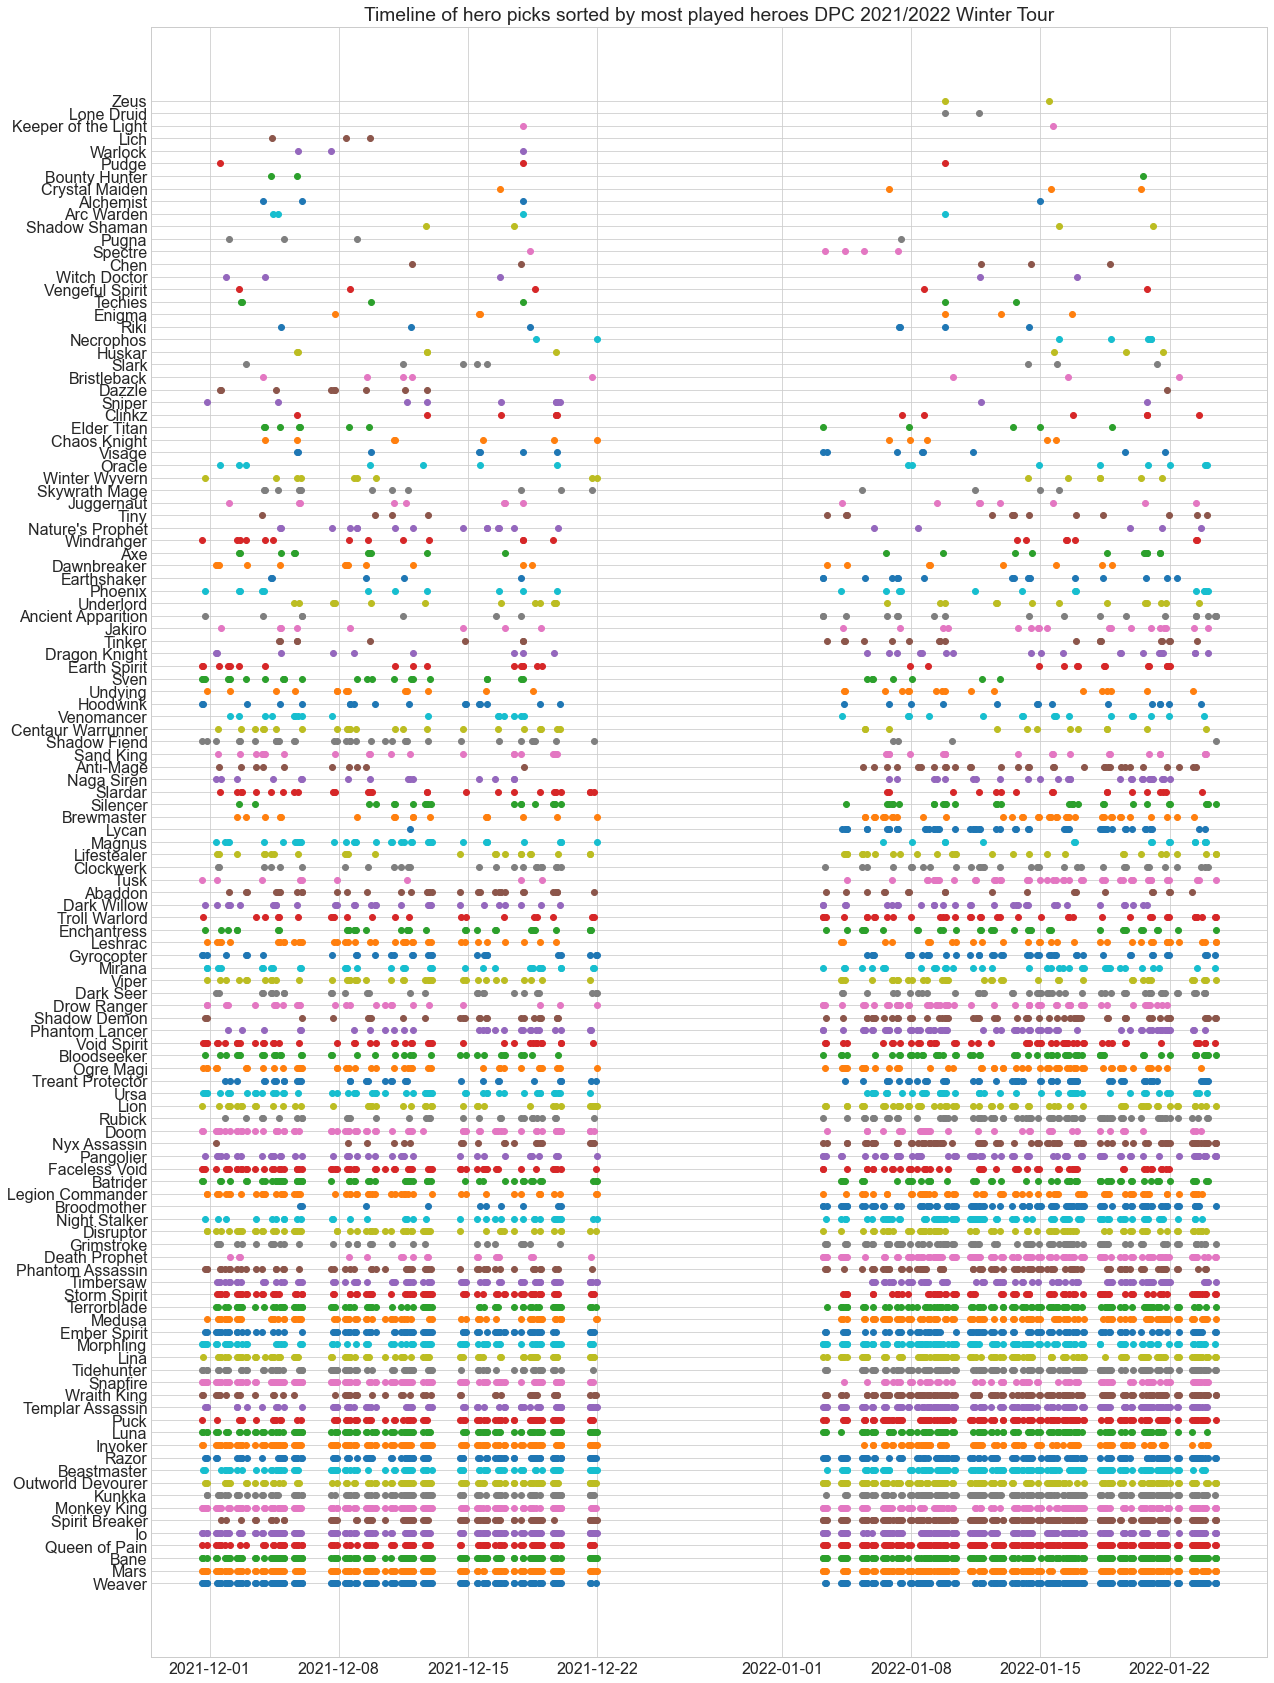

In [29]:
plt.figure(figsize=(20, 30))

# hs = ["Weaver", "Mars", "Bane", "Queen of Pain", "Io", "Necrophos"]
# hs = df['heroName'].unique()
hs = df.groupby(by='heroName')[['heroId']].count().sort_values(by='heroId', ascending=False).index
for h in hs:
    mask = df['heroName']==h
    plt.plot_date(df[mask]['startDateTime'], df[mask]['heroName'])
    
plt.title("Timeline of hero picks sorted by most played heroes DPC 2021/2022 Winter Tour")

In [30]:
df.groupby(by='heroName')[['heroId']].count().sort_values(by='heroId', ascending=False).head(20)

heroId
heroName                 
Weaver                355
Mars                  330
Bane                  321
Queen of Pain         308
Io                    307
Spirit Breaker        267
Monkey King           267
Kunkka                262
Outworld Devourer     236
Beastmaster           229
Razor                 226
Invoker               224
Luna                  217
Puck                  212
Templar Assassin      207
Wraith King           201
Snapfire              197
Tidehunter            196
Lina                  194
Morphling             189

In [31]:
df.groupby(by='heroName')[['heroId']].count().sort_values(by='heroId', ascending=False).tail(20)

heroId
heroName                   
Necrophos                 7
Riki                      7
Enigma                    6
Techies                   6
Vengeful Spirit           5
Witch Doctor              5
Chen                      5
Spectre                   5
Pugna                     4
Shadow Shaman             4
Arc Warden                4
Alchemist                 4
Crystal Maiden            4
Bounty Hunter             3
Pudge                     3
Warlock                   3
Lich                      3
Keeper of the Light       2
Lone Druid                2
Zeus                      2

In [32]:
hero_map[hero_map['hero']=='Dawnbreaker']

hero
idx             
135  Dawnbreaker

In [33]:
df[df['heroId']==135]

id  radiantTeamId  direTeamId       startDateTime  \
203   6384734705        7819028     8376426 2022-01-18 21:16:02   
328   6379254709        8180753     7819028 2022-01-15 19:58:25   
353   6374084318        8376426     8272699 2022-01-12 23:52:08   
534   6367227139        8260983     7390454 2022-01-08 23:48:21   
558   6367165592        8260983     7390454 2022-01-08 22:55:07   
1087  6316268602        8180753     7390454 2021-12-12 00:53:13   
1448  6305629702        8180753          39 2021-12-04 19:58:49   
972   6327284217        8254145     2108395 2021-12-18 11:00:34   
1250  6312155937        8214850     8244493 2021-12-09 11:10:49   
1282  6310878517        8254145     8360138 2021-12-08 12:17:28   
1308  6310781144        8360138     8254145 2021-12-08 11:00:30   
1335  6310696167         350190     2108395 2021-12-08 09:23:43   
1359  6310627809         350190     2108395 2021-12-08 08:13:21   
1522  6300480861        8261197     8254145 2021-12-01 12:00:46   
1546  6300377595        8254145     8261197 2021-12-01 11:04:50   
1570  6300301648        2108395     8214850 2021-12-01 09:08:22   
1595  6300244551        8214850     2108395 2021-12-01 08:04:40   
1055  6326528940        7119077     7391077 2021-12-17 23:23:07   
1676  6302726106        7391077     2672298 2021-12-03 00:27:37   
398   6383609197        6209804      726228 2022-01-18 08:31:11   
1451  6358802844        6209804           5 2022-01-04 11:58:47   
1622  6356868459             15     6209166 2022-01-03 10:21:46   

      firstBloodTime  didRadiantWin            radiantTeam  \
203              308           True              4 Zoomers   
328              248          False          Arkosh Gaming   
353              172           True        Wildcard Gaming   
534               13           True                TSM FTX   
558              189          False                TSM FTX   
1087             -15          False          Arkosh Gaming   
1448             235          False          Arkosh Gaming   
972              291           True             Execration   
1250               1           True                     T1   
1282             186           True             Execration   
1308             380           True                OB.Neon   
1335             199           True                 Fnatic   
1359             -41           True                 Fnatic   
1522             144           True  Motivate.Trust Gaming   
1546              -8          False             Execration   
1570             310          False           TNC Predator   
1595             157           True                     T1   
1055             215          False            Lava BestPc   
1676             313           True       Thunder Predator   
398               90           True    Royal Never Give Up   
1451             465           True    Royal Never Give Up   
1622             142           True                PSG.LGD   

                   direTeam    series_type  \
203         Wildcard Gaming  BEST_OF_THREE   
328               4 Zoomers  BEST_OF_THREE   
353         Simply TOOBASED  BEST_OF_THREE   
534             Quincy Crew  BEST_OF_THREE   
558             Quincy Crew  BEST_OF_THREE   
1087            Quincy Crew  BEST_OF_THREE   
1448          Evil Geniuses  BEST_OF_THREE   
972            TNC Predator  BEST_OF_THREE   
1250               Team SMG  BEST_OF_THREE   
1282                OB.Neon  BEST_OF_THREE   
1308             Execration  BEST_OF_THREE   
1335           TNC Predator  BEST_OF_THREE   
1359           TNC Predator  BEST_OF_THREE   
1522             Execration  BEST_OF_THREE   
1546  Motivate.Trust Gaming  BEST_OF_THREE   
1570                     T1  BEST_OF_THREE   
1595           TNC Predator  BEST_OF_THREE   
1055       Thunder Predator  BEST_OF_THREE   
1676    Infamous U.esports.  BEST_OF_THREE   
398             Vici Gaming  BEST_OF_THREE   
1451        INVICTUS GAMING  BEST_OF_THREE   
1622             Team Aster  BEST

In [34]:
df[df['heroId']==hero_map[hero_map['hero']=='Spectre'].index[0]]

id  radiantTeamId  direTeamId       startDateTime  \
894   6360403640        8360138     8214850 2022-01-05 10:08:28   
1038  6327021145        7732977     8261197 2021-12-18 08:02:33   
1361  6363782701              4           5 2022-01-07 07:00:48   
1505  6358593165             15     8118983 2022-01-04 09:18:48   
1677  6356694527             15     6209166 2022-01-03 08:04:22   

      firstBloodTime  didRadiantWin   radiantTeam               direTeam  \
894              237           True       OB.Neon                     T1   
1038             220           True  BOOM Esports  Motivate.Trust Gaming   
1361             282           True         EHOME        INVICTUS GAMING   
1505             245           True       PSG.LGD         phoenix gaming   
1677             110          False       PSG.LGD             Team Aster   

        series_type                      series_match_ids region  heroId  \
894   BEST_OF_THREE  [6360403640, 6360326298, 6360261162]    SEA      67   
1038  BEST_OF_THREE              [6327141399, 6327021145]    SEA      67   
1361  BEST_OF_THREE  [6363782701, 6363722668, 6363681975]     CN      67   
1505  BEST_OF_THREE              [6358593165, 6358546206]     CN      67   
1677  BEST_OF_THREE  [6356868459, 6356788698, 6356694527]     CN      67   

     heroName  order  isPick  
894   Spectre     20   False  
1038  Spectre     20   False  
1361  Spectre     17    True  
1505  Spectre     17    True  
1677  Spectre     21   False

In [35]:
df.groupby(by='heroName')[['heroId']].count().loc['Io']

heroId    307
Name: Io, dtype: int64

<AxesSubplot:title={'center':'histogram of when Spirit Breaker was picked in the draft'}, ylabel='Frequency'>

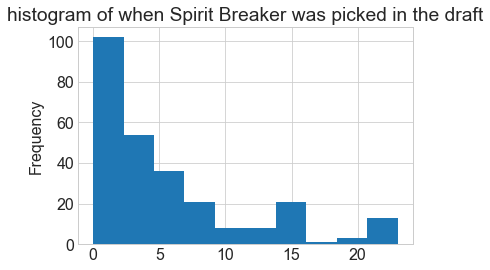

In [36]:
df[df['heroId']==hero_map[hero_map['hero']=='Spirit Breaker'].index[0]]['order'].plot.hist(title='histogram of when Spirit Breaker was picked in the draft')

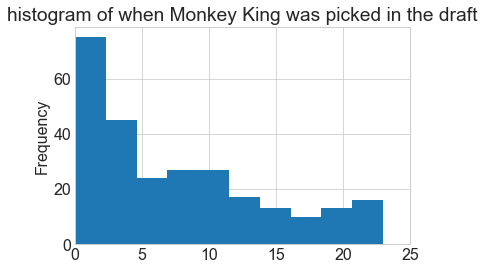

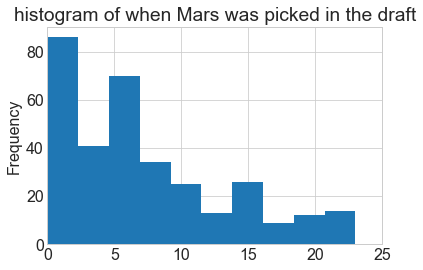

In [37]:
# for hero_name in hero_map.values.reshape(-1):
for hero_name in hero_map.values.reshape(-1)[:2]:
    # if df.groupby(by='heroName')[['heroId']].count().loc[hero_name].values[0] > 0:
    fig,ax = plt.subplots()
    df[df['heroId']==hero_map[hero_map['hero']==hero_name].index[0]]['order'].plot.hist(title=f'histogram of when {hero_name} was picked in the draft', ax=ax)
    plt.xlim(0, 25)
    plt.show()
    plt.close()

In [38]:
df.head(20)

id  radiantTeamId  direTeamId       startDateTime  firstBloodTime  \
0   6388378756        7819028     8376426 2022-01-21 00:00:01             -14   
1   6388378756        7819028     8376426 2022-01-21 00:00:01             -14   
2   6388378756        7819028     8376426 2022-01-21 00:00:01             -14   
3   6388378756        7819028     8376426 2022-01-21 00:00:01             -14   
4   6388378756        7819028     8376426 2022-01-21 00:00:01             -14   
5   6388378756        7819028     8376426 2022-01-21 00:00:01             -14   
6   6388378756        7819028     8376426 2022-01-21 00:00:01             -14   
7   6388378756        7819028     8376426 2022-01-21 00:00:01             -14   
8   6388378756        7819028     8376426 2022-01-21 00:00:01             -14   
9   6388378756        7819028     8376426 2022-01-21 00:00:01             -14   
10  6388378756        7819028     8376426 2022-01-21 00:00:01             -14   
11  6388378756        7819028     8376426 2022-01-21 00:00:01             -14   
12  6388378756        7819028     8376426 2022-01-21 00:00:01             -14   
13  6388378756        7819028     8376426 2022-01-21 00:00:01             -14   
14  6388378756        7819028     8376426 2022-01-21 00:00:01             -14   
15  6388378756        7819028     8376426 2022-01-21 00:00:01             -14   
16  6388378756        7819028     8376426 2022-01-21 00:00:01             -14   
17  6388378756        7819028     8376426 2022-01-21 00:00:01             -14   
18  6388378756        7819028     8376426 2022-01-21 00:00:01             -14   
19  6388378756        7819028     8376426 2022-01-21 00:00:01             -14   

    didRadiantWin radiantTeam         direTeam    series_type  \
0            True   4 Zoomers  Wildcard Gaming  BEST_OF_THREE   
1            True   4 Zoomers  Wildcard Gaming  BEST_OF_THREE   
2            True   4 Zoomers  Wildcard Gaming  BEST_OF_THREE   
3            True   4 Zoomers  Wildcard Gaming  BEST_OF_THREE   
4            True   4 Zoomers  Wildcard Gaming  BEST_OF_THREE   
5            True   4 Zoomers  Wildcard Gaming  BEST_OF_THREE   
6            True   4 Zoomers  Wildcard Gaming  BEST_OF_THREE   
7            True   4 Zoomers  Wildcard Gaming  BEST_OF_THREE   
8            True   4 Zoomers  Wildcard Gaming  BEST_OF_THREE   
9            True   4 Zoomers  Wildcard Gaming  BEST_OF_THREE   
10           True   4 Zoomers  Wildcard Gaming  BEST_OF_THREE   
11           True   4 Zoomers  Wildcard Gaming  BEST_OF_THREE   
12           True   4 Zoomers  Wildcard Gaming  BEST_OF_THREE   
13           True   4 Zoomers  Wildcard Gaming  BEST_OF_THREE   
14           True   4 Zoomers  Wildcard Gaming  BEST_OF_THREE   
15           True   4 Zoomers  Wildcard Gaming  BEST_OF_THREE   
16           True   4 Zoomers  Wildcard Gaming  BEST_OF_THREE   
17           True   4 Zoomers  Wildcard Gaming  BEST_OF_THREE   
18           True   4 Zoomers  Wildcard Gaming  BEST_OF_THREE   
19           True   4 Zoomers  Wildcard Gaming  BEST_OF_THREE   

            series_match_ids region  heroId           heroName  order  isPick  
0   [6388378756, 6388326281]     NA      98          Timbersaw      0   False  
1   [6388378756, 6388326281]     NA      76  Outworld Devourer      1   False  
2   [6388378756, 6388326281]     NA      39      Queen of Pain      2   False  
3   [6388378756, 6388326281]     NA      63             Weaver      3   False  
4   [6388378756, 6388326281]     NA      71     Spirit Breaker      4    True  
5   [6388378756, 6388326281]     NA       3               Bane      5    True  
6   [6388378756, 6388326281]     NA      23             Kunkka      6    True  
7   [6388378756, 6388326281]     NA      42        Wraith King      7    True  
8   [6388378756, 6388326281]     NA      46   Templar Assassin      8   False  
9   [6388378756, 6388326281]     NA      43      Death Prophet      9   False  
10  [6388378756, 6388326281]     NA     109        Terrorblade  

In [39]:
df[df['region']=='WEU'].head(24)

id  radiantTeamId  direTeamId       startDateTime  firstBloodTime  \
0   6389790676        1838315     2586976 2022-01-21 18:33:09             147   
1   6389790676        1838315     2586976 2022-01-21 18:33:09             147   
2   6389790676        1838315     2586976 2022-01-21 18:33:09             147   
3   6389790676        1838315     2586976 2022-01-21 18:33:09             147   
4   6389790676        1838315     2586976 2022-01-21 18:33:09             147   
5   6389790676        1838315     2586976 2022-01-21 18:33:09             147   
6   6389790676        1838315     2586976 2022-01-21 18:33:09             147   
7   6389790676        1838315     2586976 2022-01-21 18:33:09             147   
8   6389790676        1838315     2586976 2022-01-21 18:33:09             147   
9   6389790676        1838315     2586976 2022-01-21 18:33:09             147   
10  6389790676        1838315     2586976 2022-01-21 18:33:09             147   
11  6389790676        1838315     2586976 2022-01-21 18:33:09             147   
12  6389790676        1838315     2586976 2022-01-21 18:33:09             147   
13  6389790676        1838315     2586976 2022-01-21 18:33:09             147   
14  6389790676        1838315     2586976 2022-01-21 18:33:09             147   
15  6389790676        1838315     2586976 2022-01-21 18:33:09             147   
16  6389790676        1838315     2586976 2022-01-21 18:33:09             147   
17  6389790676        1838315     2586976 2022-01-21 18:33:09             147   
18  6389790676        1838315     2586976 2022-01-21 18:33:09             147   
19  6389790676        1838315     2586976 2022-01-21 18:33:09             147   
20  6389790676        1838315     2586976 2022-01-21 18:33:09             147   
21  6389790676        1838315     2586976 2022-01-21 18:33:09             147   
22  6389790676        1838315     2586976 2022-01-21 18:33:09             147   
23  6389790676        1838315     2586976 2022-01-21 18:33:09             147   

    didRadiantWin  radiantTeam direTeam  series_type series_match_ids region  \
0           False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
1           False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
2           False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
3           False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
4           False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
5           False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
6           False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
7           False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
8           False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
9           False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
10          False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
11          False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
12          False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
13          False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
14          False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
15          False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
16          False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
17          False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
18          False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
19          False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
20          False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
21          False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
22          False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
23          False  Team Secret       OG  BEST_OF_ONE     [63897906

In [40]:
df[df['id']==6389790676]

id  radiantTeamId  direTeamId       startDateTime  firstBloodTime  \
0   6389790676        1838315     2586976 2022-01-21 18:33:09             147   
1   6389790676        1838315     2586976 2022-01-21 18:33:09             147   
2   6389790676        1838315     2586976 2022-01-21 18:33:09             147   
3   6389790676        1838315     2586976 2022-01-21 18:33:09             147   
4   6389790676        1838315     2586976 2022-01-21 18:33:09             147   
5   6389790676        1838315     2586976 2022-01-21 18:33:09             147   
6   6389790676        1838315     2586976 2022-01-21 18:33:09             147   
7   6389790676        1838315     2586976 2022-01-21 18:33:09             147   
8   6389790676        1838315     2586976 2022-01-21 18:33:09             147   
9   6389790676        1838315     2586976 2022-01-21 18:33:09             147   
10  6389790676        1838315     2586976 2022-01-21 18:33:09             147   
11  6389790676        1838315     2586976 2022-01-21 18:33:09             147   
12  6389790676        1838315     2586976 2022-01-21 18:33:09             147   
13  6389790676        1838315     2586976 2022-01-21 18:33:09             147   
14  6389790676        1838315     2586976 2022-01-21 18:33:09             147   
15  6389790676        1838315     2586976 2022-01-21 18:33:09             147   
16  6389790676        1838315     2586976 2022-01-21 18:33:09             147   
17  6389790676        1838315     2586976 2022-01-21 18:33:09             147   
18  6389790676        1838315     2586976 2022-01-21 18:33:09             147   
19  6389790676        1838315     2586976 2022-01-21 18:33:09             147   
20  6389790676        1838315     2586976 2022-01-21 18:33:09             147   
21  6389790676        1838315     2586976 2022-01-21 18:33:09             147   
22  6389790676        1838315     2586976 2022-01-21 18:33:09             147   
23  6389790676        1838315     2586976 2022-01-21 18:33:09             147   

    didRadiantWin  radiantTeam direTeam  series_type series_match_ids region  \
0           False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
1           False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
2           False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
3           False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
4           False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
5           False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
6           False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
7           False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
8           False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
9           False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
10          False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
11          False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
12          False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
13          False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
14          False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
15          False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
16          False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
17          False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
18          False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
19          False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
20          False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
21          False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
22          False  Team Secret       OG  BEST_OF_ONE     [6389790676]    WEU   
23          False  Team Secret       OG  BEST_OF_ONE     [63897906

In [41]:
# how many unique heroes did each team play?

In [42]:
unique_teams = np.unique(list(df['radiantTeam'].unique()) + list(df['direTeam'].unique()))

In [43]:
unique_teams

array(['4 Zoomers', 'APU King of Kings', 'AS Monaco Gambit', 'Alliance',
       'Arkosh Gaming', 'BOOM Esports', 'Black N Yellow', 'Coolguys',
       'EHOME', 'Evil Geniuses', 'Execration', 'Fnatic', 'HellRaisers',
       'Hokori', 'INVICTUS GAMING', 'Infamous U.esports.', 'LBZS',
       'Lava BestPc', 'Mind Games', 'Motivate.Trust Gaming',
       'Natus Vincere', 'Nigma Galaxy', 'Noping VPN', 'OB.Neon', 'OG',
       'PSG.LGD', 'PuckChamp', 'Quincy Crew', 'Royal Never Give Up',
       'SG esports', 'Simply TOOBASED', 'T1', 'TNC Predator', 'TSM FTX',
       'Team Aster', 'Team Empire', 'Team Liquid', 'Team SMG',
       'Team Secret', 'Team Spirit', 'Team Tickles', 'Thunder Predator',
       'Tundra Esports ', 'Vici Gaming', 'Virtus.pro', 'Wildcard Gaming',
       'beastcoast', 'phoenix gaming'], dtype='<U21')

In [44]:
# get list of all games played by each team

In [45]:
unique_heroes_by_team = {}
for team in unique_teams:
    mask = (df['radiantTeam'] == team) | (df['direTeam'] == team)
    unique_heroes_by_team[team] = df[mask]['heroId'].unique()

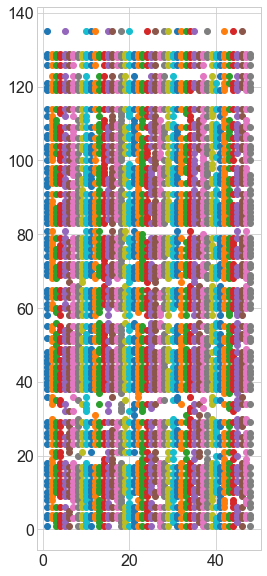

In [46]:
plt.figure(figsize=(4, 10))
for i, (k, v) in enumerate(unique_heroes_by_team.items()):
    # plt.scatter(v, np.ones_like(v)+i)
    plt.scatter(np.ones_like(v)+i, v)

In [104]:
team_region_map = {}
for team in unique_teams:
    mask = (df['radiantTeam'] == team) | (df['direTeam'] == team)
    team_region_map[team] = df[mask]['region'].values[0]

In [105]:
total_num_games_each_team = {}
for team in unique_teams:
    mask = (df['radiantTeam'] == team) | (df['direTeam'] == team)
    total_num_games_each_team[team] = len(df[mask].groupby(by='id').count().index)

In [108]:
df_num_unique_heroes = pd.DataFrame(
    {
        "num_unique":[len(unique_heroes_by_team[team]) for team in unique_teams],
        "total_num_games":[total_num_games_each_team[team] for team in unique_teams],
        "region":[team_region_map[team] for team in unique_teams]
    },
    index=unique_teams
)

In [109]:
df_num_unique_heroes.sort_values(by='num_unique', ascending=False)

num_unique  total_num_games region
Lava BestPc                    97               18     SA
APU King of Kings              91               20     SA
Noping VPN                     87               20     SA
Evil Geniuses                  86               17     NA
Hokori                         84               17     SA
Thunder Predator               84               16     SA
beastcoast                     83               19     SA
Virtus.pro                     83               19    EEU
TSM FTX                        83               17     NA
Team Liquid                    82               19    WEU
Nigma Galaxy                   82               18    WEU
Coolguys                       82               15    WEU
HellRaisers                    81               18    EEU
OG                             81               19    WEU
Team Secret                    80               18    WEU
Team Aster                     80               20     CN
Tundra Esports                 80               18    WEU
Team Empire                    79               17    EEU
Infamous U.esports.            79               18     SA
Black N Yellow                 78               19     NA
PSG.LGD                        78               17     CN
Arkosh Gaming                  78               15     NA
4 Zoomers                      77               18     NA
Motivate.Trust Gaming          77               18    SEA
Natus Vincere                  77               18    EEU
OB.Neon                        76               20    SEA
Quincy Crew                    76               18     NA
Team SMG                       75               18    SEA
PuckChamp                      75               17    EEU
Wildcard Gaming                75               18     NA
Alliance                       75               15    WEU
Execration                     75               17    SEA
Royal Never Give Up            74               22     CN
SG esports                     74               16     SA
AS Monaco Gambit               74               15    EEU
EHOME                          74               18     CN
Vici Gaming                    73               17     CN
INVICTUS GAMING                73               17     CN
Simply TOOBASED                73               14     NA
Team Tickles                   72               16    WEU
TNC Predator                   72               15    SEA
T1                             72               18    SEA
phoenix gaming                 72               16     CN
Fnatic                         71               17    SEA
Team Spirit                    71               15    EEU
LBZS                           71               17     CN
Mind Games                     70               15    EEU
BOOM Esports                   67               13    SEA

In [53]:
df[df['heroId']==44].groupby("radiantTeam")[['heroId']].count().sort_values(by='heroId', ascending=False).rename(columns={"heroId":hero_map.loc[44].values[0]})

Phantom Assassin
radiantTeam                            
Team Tickles                         10
Tundra Esports                        7
Natus Vincere                         6
Team Secret                           5
PuckChamp                             5
BOOM Esports                          5
Coolguys                              5
Fnatic                                5
OB.Neon                               5
Mind Games                            4
Team Empire                           4
Black N Yellow                        4
Wildcard Gaming                       4
Simply TOOBASED                       4
Thunder Predator                      3
Team Liquid                           3
TNC Predator                          3
APU King of Kings                     3
T1                                    3
Team Spirit                           3
Infamous U.esports.                   3
Virtus.pro                            3
Arkosh Gaming                         3
Alliance                              3
AS Monaco Gambit                      3
Vici Gaming                           2
4 Zoomers                             2
OG                                    2
SG esports                            2
Quincy Crew                           2
PSG.LGD                               2
Noping VPN                            2
HellRaisers                           2
TSM FTX                               1
Team Aster                            1
Team SMG                              1
Nigma Galaxy                          1
Motivate.Trust Gaming                 1
LBZS                                  1
INVICTUS GAMING                       1
Hokori                                1
Execration                            1
EHOME                                 1
phoenix gaming                        1